<a href="https://colab.research.google.com/github/STGKON/spamdetectioneasily/blob/main/silence_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='black'>"SPAM email detection using ML algorithms"
</font>
<font color='white'> (Naive Bayes,Logistic Regression,SGD classifier,SimpleRNN)</font>


---
### Department of Computer Science and biomedical informatics.
University of Thessaly  
June 2024

---




### **Data acquistion**
#### The dataset used for this project is called **"combined_data.csv"**.
This is a csv file containing **83446 records** of email which are labelled as either **spam or not-spam.**
It is formed by combining the 2007 TREC Public Spam Corpus and Enron-Spam Dataset.
#### **Columns**
**label**->
'1' indicates that the email is classified as spam.
'0' denotes that the email is legitimate (ham).

**text**->
This column contains the actual content of the email messages.

#### **AIM OF THE PROJECT:**

In this project, the goal is to compare different algorithms as spam email detectors.
Basically, the project is a binary classification problem.
The first thing in this procedure is the data preprocessing (data cleaning,drop missing or duplicated values etc.).
Next step is to train our system with  3 simple and commonly used **classifiers** (SGD,Naive Bayes,Logistic Regresion) and also to deploy a more complex solution by using a **SimpleRNN.**
In the end,we observed  their performance by measuring different **metrics**(accuracy F1 score,confusion matrix) and by applying an **EDA comparison** we try to come up with the optimal model for the specific problem.

### **STEP 1**:
First of all we import the necessary libraries and packages

*   Basic python libraries(Numpy,pandas)
*   Machine Learning and Model
     Evaluation (sklearn)
*  imblearn for imbalanced dataset
   Visualization libraries(Matplotlib,Seaborn)
*  Deep Learning libraries(TensorFlow,Keras)






In [ ]:
#Basic python libraries
import numpy as np
import pandas as pd
import time
from wordcloud import WordCloud

#Import libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import  naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#Import library imblearn to perform re-sampling tecniques to balnce the dataset
from imblearn.under_sampling import RandomUnderSampler

#Libraries to visualize the data
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

#Import tensorflow and keras for deploying deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [ ]:
#Command to read,create a dataframe and  store in 'df'
df=pd.read_csv("/content/drive/MyDrive/combined_data.csv")


# STEP 2 : Data Acquisition and Preprocessing
Next step is **data preprocessing**. A very important procedure to find out the structure of the data,check for missing or duplicated values that maybe affect the performance of our model.**Cleaning and visualize the dataset** is crucial before applying any ML algorithms.


In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
label    0
text     0
dtype: int64


In [ ]:
# Check for duplicated rows
print("Duplicated Values:")
print(df.duplicated().sum())

Duplicated Values:
0


In [ ]:
# Check for infinite values in numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Infinite Values:")
print(np.isinf(df[numeric_columns]).sum())


Infinite Values:
label    0
dtype: int64


label
1    43910
0    39538
Name: count, dtype: int64


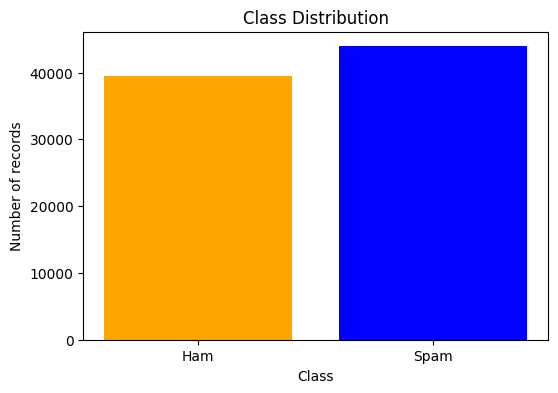

In [ ]:
#Let's find out the number of records in each class
class_counts = df['label'].value_counts()
print(class_counts)

# We visualize the dataset by creating a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


In [ ]:
print("Dimension of the row data:",df.shape)
df.head()

Dimension of the row data: (83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# **Step 3**: Data Preprocessing and Visualization

In [ ]:
#Let's convert the string labels 'spam' and 'ham' to numeric values 1 and 0, respectively.
df.loc[df['label'] == 'spam', 'label'] = 1
df.loc[df['label'] == 'ham', 'label'] = 0

print("Unique values in 'label' column after conversion:")
print(df['label'].unique())


Unique values in 'label' column after conversion:
[1 0]


In [ ]:
X = df['text']
y = df['label']
print(X)


0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object


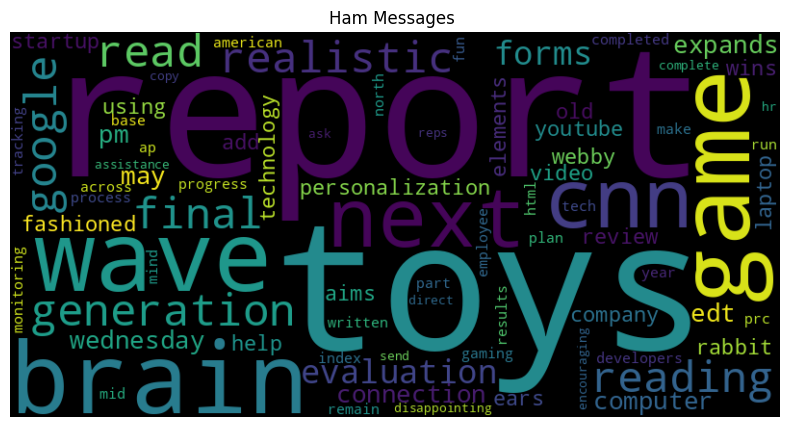

In [ ]:

# Example DataFrame


data = {
    'text': [
        "computer connection from cnn com wednesday, may pm edt in this report next generation toys read brain waves google expands personalization youtube wins webby old fashioned rabbit ears laptop review next generation toys read brain waves a startup company aims to add more realistic elements to video games by using brain wave reading technology to help game developers make gaming more realistic http www cnn com  tech fun games  mind reading toys ap index html google",
        "below is the final report i plan to run on our progress in monitoring and tracking completed mid - year written evaluation forms across the north american employee base ( who were a part of the prc process the results remain disappointing and i would again ask for your assistance in encouraging your direct reports to complete and send a copy of the final evaluation forms to their hr reps"
    ],
    'label': ["ham", "ham"]
}
df = pd.DataFrame(data)

# Filter ham messages
ham_messages = df[df['label'] == 'ham']['text']

# Combine all ham messages into a single string
ham_text = ' '.join(ham_messages)

# Generate word cloud for ham messages with bilinear interpolation
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_text)

# Plot the word cloud for ham messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')  # Interpolation method set to bilinear
plt.title("Ham Messages ")
plt.axis('off')
plt.show()

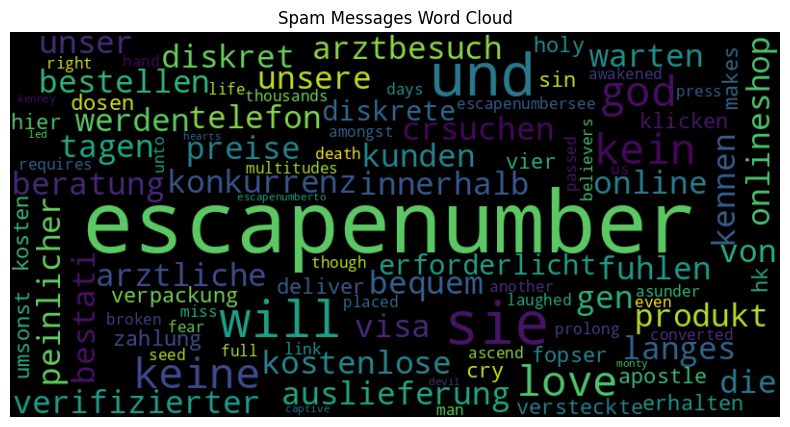

In [ ]:


# Example DataFrame
data = {
    'text': [
        "crsuchen sie unser produkt und sie werden fuhlen was unsere kunden bestati gen preise die keine konkurrenz kennen kein langes warten auslieferung innerhalb von escapenumber escapenumber tagen bequem und diskret online bestellen kostenlose arztliche telefon beratung visa verifizierter onlineshop kein peinlicher arztbesuch erforderlicht diskrete verpackung und zahlung keine versteckte kosten klicken sie hier und sie erhalten vier dosen umsonst www fopser hk",
        "holy apostle makes them cry out 'who shall deliver sin he escapenumber should escapenumbersee his seed he should prolong his days and we are passed escapenumber from death unto life because we love the link can ever be broken asunder escapenumber from another was there no multitudes there are and have been who escapenumber though awakened to but also had man amongst them who were so full of the escapenumber because of the press and for fear of being laughed at and believers escapenumber will ascend and be placed at the right hand of god himself even after escapenumber he had converted thousands and was very miss it god requires us escapenumberto escapenumber love him with all our hearts with and led captive by the devil at his escapenumber will why then will you monty kenney"
    ],
    'label': ["spam", "spam"]
}
df = pd.DataFrame(data)

# Filter spam messages
spam_messages = df[df['label'] == 'spam']['text']

# Combine all spam messages into a single string
spam_text = ' '.join(spam_messages)

# Generate word cloud for spam messages with bilinear interpolation
wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_text)

# Plot the word cloud for spam messages
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')  # Interpolation method set to bilinear
plt.title("Spam Messages Word Cloud")
plt.axis('off')
plt.show()


#  Step 4: Data Splitting and Feature Extraction
After that we should split the dataset into training and testing set to be able to see the model's performance in unseen data.
By using an TF-IDF vectorizer we convert the  raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
#learns the vocabulary and idf from the training data (X_train)
X_train_features = feature_extraction.fit_transform(X_train)
# then transforms the training data into a TF-IDF feature matrix.
X_test_features = feature_extraction.transform(X_test)

#converts the label data (y_train and y_test) to integer type.
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(X_train)

9381     hi ,\ni sent you an email last week and need t...
11566    i'm taking requests http use perl org petdance...
40822    on escapenumber escapenumber escapenumber tony...
35045    sunday escapenumber a pril escapenumber escape...
38667    sally ,\nattached is the detail of the analyst...
                               ...                        
6265     anita . from our conversation today with daren...
54886    business highlights\nenron freight markets\nen...
76820    i am rebuilding r in a mandriva linux environm...
860      alternative medicine database over escapenumbe...
15795     escapenumberfxml version escapenumberd escape...
Name: text, Length: 66758, dtype: object


In [ ]:
print(y)

0        1
1        1
2        0
3        1
4        0
        ..
83443    0
83444    1
83445    1
83446    0
83447    1
Name: label, Length: 83448, dtype: int64


# **Step 5: Handling Class Imbalance**

<ipython-input-43-95ddefd14452>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Greens')
<ipython-input-43-95ddefd14452>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='Blues')
<ipython-input-43-95ddefd14452>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_resampled, palette='magma')


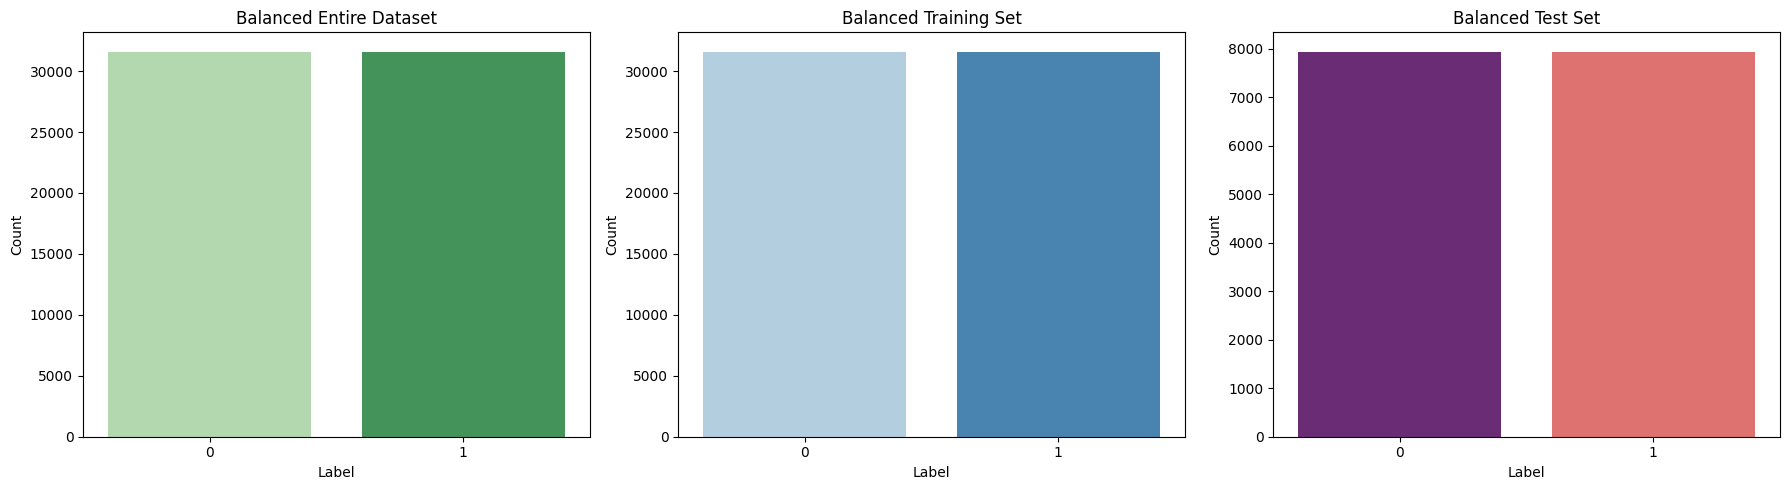

In [ ]:
#Perform an undersampling teqnique to balance the dataset

# Perform undersampling on the entire dataset
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_features, y_train)

# Perform undersampling on the training set
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_features, y_train)

# Perform undersampling on the test set
X_test_resampled, y_test_resampled = undersampler.fit_resample(X_test_features, y_test)

# Visualize the distribution of labels after undersampling
plt.figure(figsize=(18, 5))

# Plot the distribution of labels in the balanced entire dataset
plt.subplot(1, 3, 1)
sns.countplot(x=y_resampled, palette='Greens')
plt.title('Balanced Entire Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

# Plot the distribution of labels in the balanced training set
plt.subplot(1, 3, 2)
sns.countplot(x=y_train_resampled, palette='Blues')
plt.title('Balanced Training Set')
plt.xlabel('Label')
plt.ylabel('Count')

# Plot the distribution of labels in the balanced test set
plt.subplot(1, 3, 3)
sns.countplot(x=y_test_resampled, palette='magma')
plt.title('Balanced Test Set')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
print(X_train_features)

  (0, 103280)	0.10487688058981103
  (0, 79381)	0.1505051292949914
  (0, 155588)	0.1275108098741517
  (0, 175676)	0.26484709752183394
  (0, 21274)	0.28854397448691005
  (0, 142698)	0.11584895429014755
  (0, 191913)	0.1009464317148501
  (0, 32945)	0.08552729018321764
  (0, 28665)	0.299883855335989
  (0, 201608)	0.3079296288409907
  (0, 111785)	0.05190695799893191
  (0, 93146)	0.11197771328704918
  (0, 207621)	0.11775566147675853
  (0, 136937)	0.1143567439429523
  (0, 242488)	0.10204971813934793
  (0, 126274)	0.07537014032051642
  (0, 149090)	0.1479463092676407
  (0, 182172)	0.10943602303381333
  (0, 23304)	0.13434667414924653
  (0, 172184)	0.13432788504044377
  (0, 151303)	0.11427409463420435
  (0, 6603)	0.21100135707058745
  (0, 138328)	0.15000717689941148
  (0, 1)	0.11980193242161444
  (0, 2670)	0.15947018806591298
  :	:
  (66757, 53421)	0.02290237358631543
  (66757, 56726)	0.017634279453643896
  (66757, 213227)	0.020566371258418568
  (66757, 136545)	0.011190459103681702
  (66757, 2380

# **Step 6: Model Training and Evaluation**
Let's initialize the classifiers and ckeck out some of their key features

**Naive Bayes**:Eager learner algorithm suitable for text classification->efficient,fast and simple with good performance.

**Logistic Regression:**Eager learner algorithm suitable for Binary Classification->Efficient,Interpretability,Fast Training

**SGD**:Lazy learner algorithm suitable for text classification->efficient,flexible

In [ ]:
# Dictionary to store accuracies and execution times
results = {
    'Naive Bayes': {'accuracy': None, 'time': None},
    'Logistic Regression': {'accuracy': None, 'time': None},
    'SGD Classifier': {'accuracy': None, 'time': None},
    'Simple RNN': {'accuracy': None, 'time': None}
}


# Naive bayes

Accuracy: 97.69%
F1 Score: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7938
           1       0.99      0.96      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690

Confusion Matrix:
[[7859   79]
 [ 307 8445]]


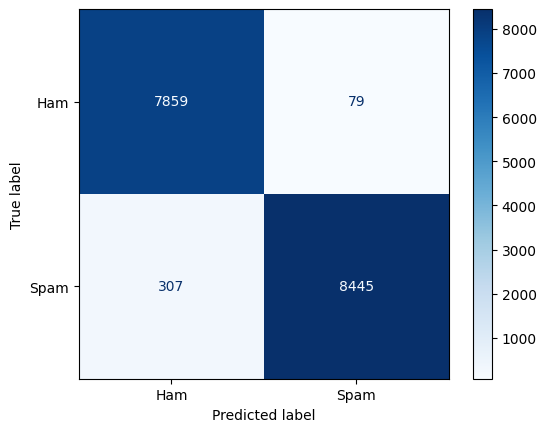

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
# Initialize Naive Bayer classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_features, y_train)

start_time = time.time()
# Predict on test data
y_pred_nb = nb_classifier.predict(X_test_features)

# Measure accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb*100:.2f}%')

# Measure F1 score
f1_nb = f1_score(y_test, y_pred_nb)
print(f'F1 Score: {f1_nb:.2f}')

# Generate classification report
report_nb = classification_report(y_test, y_pred_nb)

print('Classification Report:')
print(report_nb)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

end_time = time.time()
results['Naive Bayes']['accuracy'] = accuracy_nb * 100
results['Naive Bayes']['time'] = end_time - start_time

Accuracy: 98.63%
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

Confusion Matrix:
[[7777  161]
 [  67 8685]]


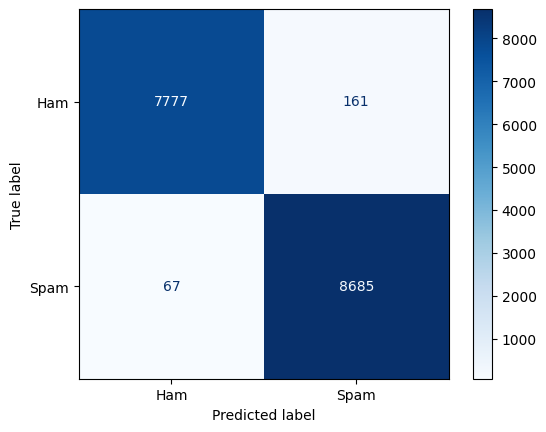

In [ ]:
# Initialize Logistic Regression classifier
start_time = time.time()
lr_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
lr_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lr = lr_classifier.predict(X_test_features)

# Measure accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy_lr*100:.2f}%')

# Measure F1 score
f1_lr = f1_score(y_test, y_pred_lr)
print(f'F1 Score: {f1_lr:.2f}')

# Generate classification report
report_lr = classification_report(y_test, y_pred_lr)
print('Classification Report:')
print(report_lr)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


end_time = time.time()
results['Logistic Regression']['accuracy'] = accuracy_lr * 100
results['Logistic Regression']['time'] = end_time - start_time


Accuracy: 98.63%
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7938
           1       0.98      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

Confusion Matrix:
[[7759  179]
 [  49 8703]]


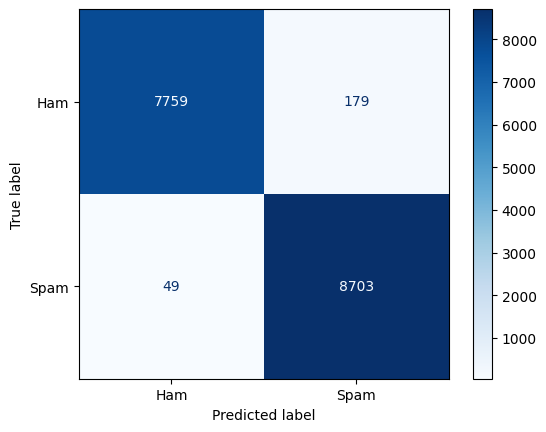

In [ ]:
start_time = time.time()

# Initialize SGD Classifier
sgd_classifier = SGDClassifier()

# Train the classifier
sgd_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_sgd = sgd_classifier.predict(X_test_features)

# Measure accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f'Accuracy: {accuracy_sgd*100:.2f}%')

# Measure F1 score
f1_sgd = f1_score(y_test, y_pred_sgd)
print(f'F1 Score: {f1_sgd:.2f}')

# Generate classification report
report_sgd = classification_report(y_test, y_pred_sgd)
print('Classification Report:')
print(report_sgd)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_sgd)
print('Confusion Matrix:')
print(conf_matrix)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

end_time = time.time()
results['SGD Classifier']['accuracy'] = accuracy_sgd * 100
results['SGD Classifier']['time'] = end_time - start_time


<ipython-input-50-f3a2d8b6411f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette='magma')


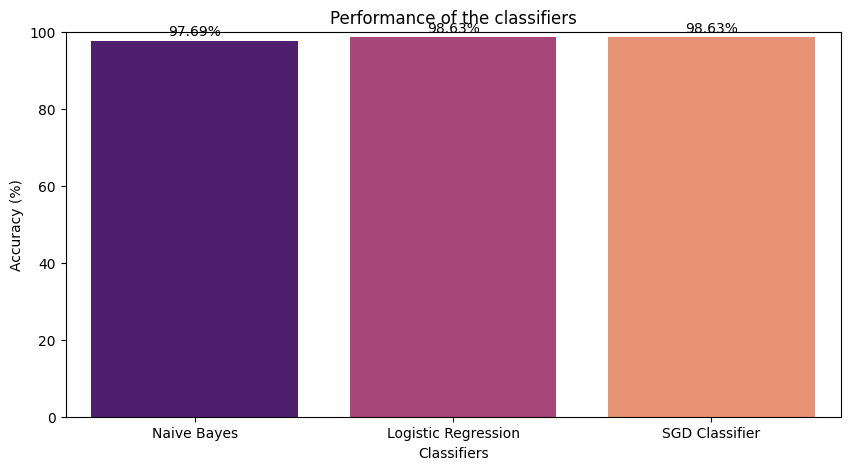

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example accuracies for Naive Bayes, Logistic Regression, and SGD Classifier
models = ['Naive Bayes', 'Logistic Regression', 'SGD Classifier']
accuracies = [accuracy_nb * 100, accuracy_lr * 100, accuracy_sgd * 100]  # Replace these with your actual accuracies

plt.figure(figsize=(10, 5))

# Create bar plot
ax = sns.barplot(x=models, y=accuracies, palette='magma')

# Add annotation above each bar
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Performance of the classifiers")

plt.xlabel("Classifiers")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Set y-axis limit to percentage
plt.show()



In [ ]:
#CHECK TO OVERFITTING
# NAIVE BAYES

# Plotting the accuracy and F1 score
metrics = ['Accuracy', 'F1 Score']
test_scores = [accuracy_nb_test * 100, f1_nb_test]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar(x, test_scores, width=0.4, label='Test', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Naive Bayes Performance on Training and Test Sets')
plt.xticks(x, metrics)
plt.ylim(0, 100)  # Set y-axis limit to percentage
plt.legend()
plt.show()

results['Naive Bayes']['accuracy'] = accuracy_nb_test * 100
results['Naive Bayes']['time'] = end_time - start_time

#Logistic Regresion
# Plotting the accuracy and F1 score
metrics = ['Accuracy', 'F1 Score']
train_scores = [accuracy_lr_train * 100, f1_lr_train]
test_scores = [accuracy_lr_test * 100, f1_lr_test]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar(x, test_scores, width=0.4, label='Test', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Logistic Regression Performance on Training and Test Sets')
plt.xticks(x, metrics)
plt.ylim(0, 100)  # Set y-axis limit to percentage
plt.legend()
plt.show()

results['Logistic Regression']['accuracy'] = accuracy_lr_test * 100
results['Logistic Regression']['time'] = end_time - start_time
# Store results
results = {}
results['Logistic Regression'] = {
    'accuracy_train': accuracy_lr_train * 100,
    'accuracy_test': accuracy_lr_test * 100,
    'f1_train': f1_lr_train,
    'f1_test': f1_lr_test,
    'time': end_time - start_time
}

#SGD

# Plotting the accuracy and F1 score
metrics = ['Accuracy', 'F1 Score']
train_scores = [accuracy_sgd_train * 100, f1_sgd_train]
test_scores = [accuracy_sgd_test * 100, f1_sgd_test]

x = range(len(metrics))

plt.figure(figsize=(10, 5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar(x, test_scores, width=0.4, label='Test', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('SGD Classifier Performance on Training and Test Sets')
plt.xticks(x, metrics)
plt.ylim(0, 100)  # Set y-axis limit to percentage
plt.legend()
plt.show()

results['SGD Classifier']['accuracy'] = accuracy_sgd_test* 100
results['SGD Classifier']['time'] = end_time - start_time

# Store results
results = {}
results['SGD Classifier'] = {
    'accuracy_train': accuracy_sgd_train * 100,
    'accuracy_test': accuracy_sgd_test * 100,
    'f1_train': f1_sgd_train,
    'f1_test': f1_sgd_test,
    'time': end_time - start_time
}

# **Step 7: Simple RNN Model**

Let's prepare our text data tto be suitable as an input in the RNN,by implementing these two steps:

**Tokenization**: Converts text data into numerical data the complexity of text data by transforming words into their respective integer indices.

**Padding and Truncation:** Ensures that all sequences have the same length, which is a requirement for many machine learning models, including RNNs


In [ ]:
# Tokenization
max_words = 10000  # Maximum number of words to keep
maxlen = 100  # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=maxlen)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=32, input_length=maxlen),
    SimpleRNN(32),  # Simple RNN layer with 32 units
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and measure time
start_time = time.time()

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time = time.time()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
results['Simple RNN']['accuracy'] = accuracy * 100
results['Simple RNN']['time'] = end_time - start_time


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1669/1669 [==============================] - 56s 32ms/step - loss: 0.1342 - accuracy: 0.9506 - val_loss: 0.0679 - val_accuracy: 0.9765
Epoch 2/10
1669/1669 [==============================] - 51s 31ms/step - loss: 0.0489 - accuracy: 0.9836 - val_loss: 0.0645 - val_accuracy:

522/522 [==============================] - 4s 7ms/step - loss: 0.1122 - accuracy: 0.9728
Test Loss: 0.11223297566175461
Test Accuracy: 0.9727981090545654


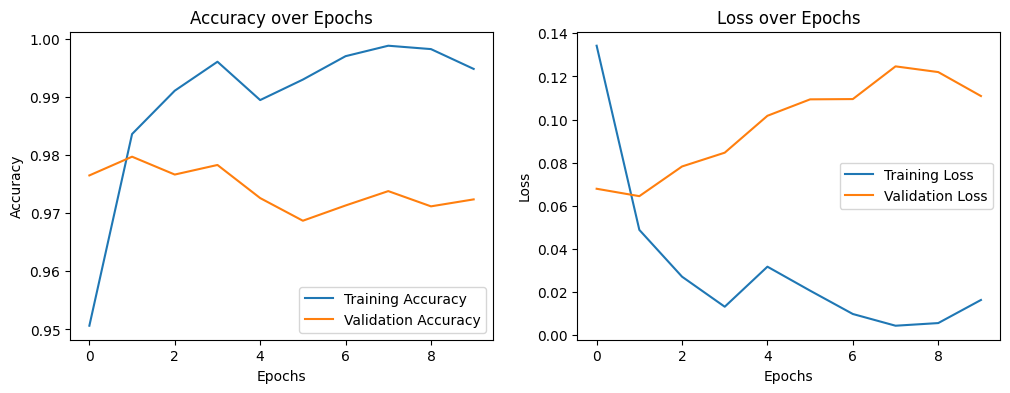

In [ ]:
#Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Step 8: Model Performance Visualization**

Performance and Execution Time:
Naive Bayes - Accuracy: 97.69%, Time: 1.60 seconds
Logistic Regression - Accuracy: 98.63%, Time: 22.96 seconds
SGD Classifier - Accuracy: 98.63%, Time: 0.74 seconds
Simple RNN - Accuracy: 97.28%, Time: 564.23 seconds


<ipython-input-54-01a5ce37e76d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=models, y=accuracies, palette='magma')
<ipython-input-54-01a5ce37e76d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=models, y=times, palette='magma')


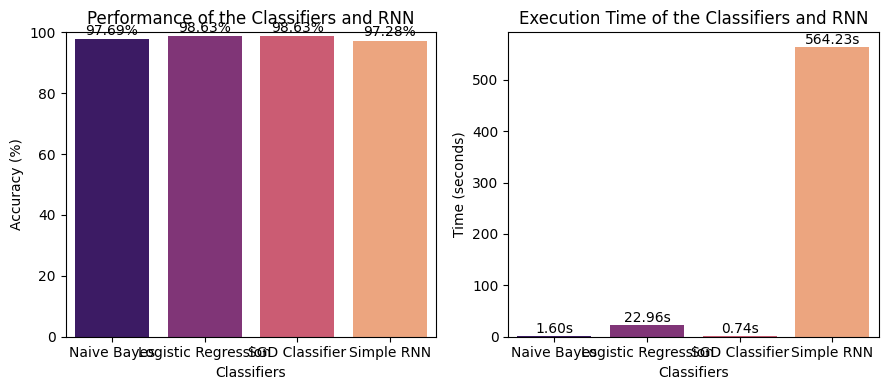

In [ ]:
# Display the results
print("Performance and Execution Time:")
for model, metrics in results.items():
    print(f"{model} - Accuracy: {metrics['accuracy']:.2f}%, Time: {metrics['time']:.2f} seconds")


# Plot the results
models = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]
times = [metrics['time'] for metrics in results.values()]


plt.figure(figsize=(9, 4))

# Create bar plot for accuracies
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=models, y=accuracies, palette='magma')
for i, acc in enumerate(accuracies):
    ax1.text(i, acc + 0.5, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.title("Performance of the Classifiers and RNN")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

# Create bar plot for execution times
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=models, y=times, palette='magma')
for i, time_ in enumerate(times):
    ax2.text(i, time_ + 0.5, f'{time_:.2f}s', ha='center', va='bottom', fontsize=10, color='black')
plt.title("Execution Time of the Classifiers and RNN")
plt.xlabel("Classifiers")
plt.ylabel("Time (seconds)")

plt.tight_layout()
plt.show()

# RESOURCES

1)Spam Email Classification Dataset. (2023, November 6). Kaggle. https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset

2)Chio, C., & Freeman, D. (2018). Machine Learning and Security. “O’Reilly Media, Inc.”

3)Fr.Marcelloni,ARTIFICIAL INTELLIGENCE FOR CYBERSECURITY(ING-INF/05 notes 2023-2024). https://esami.unipi.it/esami2/programma.php?pg=ects&c=52658

4)https://colab.google/

5)SGDClassifier. (n.d.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

6)Amvillalobos. (2020, November 17). RNN-Text-Classification. Kaggle. https://www.kaggle.com/code/amvillalobos/rnn-text-classification

7)Zaki, M. J., & Meira, W. (2020). Data Mining and Machine Learning. Cambridge University Press. http://books.google.ie/books?id=oafDDwAAQBAJ&printsec=frontcover&dq=Data+Mining+and+Machine+Learning:+Fundamental+Concepts+and+Algorithms,Mohammed+J.+Zaki,+Wagner+Meira,+Jr,+Wagner+Meira&hl=&cd=1&source=gbs_api